# pyivp.CPAEngine

> API details.

In [1]:
from nbdev.showdoc import *

### Compile and Install lib_pyivp (partially)

In [2]:
! cd ~/pyivp && make

make -C src
make[1]: Entering directory '/home/arg/pyivp/src'
mkdir build; cd build; cmake ..; make
mkdir: cannot create directory ‘build’: File exists
-------------------------------------------------------Use UTM:ON
+++++++++++++++++++++++++++++++++++++++++
IVP_GUI_CODE will be built......         
+++++++++++++++++++++++++++++++++++++++++
USING UTM
+++++++++++++++++++++++++++++++++++++++++
IVP_LIB_DIRECTORY:/usr/local/lib/
+++++++++++++++++++++++++++++++++++++++++
Bin directory: /home/arg/bin
Include directory: /usr/local/include
Lib directory: /usr/local/lib/
-- Configuring done
-- Generating done
-- Build files have been written to: /home/arg/pyivp/src/build
make[2]: Entering directory '/home/arg/pyivp/src/build'
make[3]: Entering directory '/home/arg/pyivp/src/build'
make[4]: Entering directory '/home/arg/pyivp/src/build'
make[4]: Leaving directory '/home/arg/pyivp/src/build'
[ 23%] Built target mbutil
make[4]: Entering directory '/home/arg/pyivp/src/build'
make[4]: Leaving direc

### Run python library in Jupyter Notebook

In [3]:
import pyivp

### CPAEngine
create a CPAEngine object, arguments below are necessary for cpa <br />
CPAEngine(arg0, arg1, arg2, arg3, arg4, arg5): 
* arg0&lt;float&gt;: cny, Given Contact Latitude Position
* arg1&lt;float&gt;: cnx, Given Contact Longitude Position
* arg2&lt;float&gt;: cnh, Given Contact Course (degrees: 0-359)
* arg3&lt;float&gt;: cnv, Given Contact Speed (Unit: knots per hour)
* arg4&lt;float&gt;: osy, Given Ownship Latitude Position
* arg5&lt;float&gt;: osx, Given Ownship Longitude Position

In [4]:
pybind_cpa = pyivp.CPAEngine(127, 31, 50, 6, 128, 32)

In [5]:
print(pybind_cpa.__init__.__doc__)

__init__(*args, **kwargs)
Overloaded function.

1. __init__(self: pyivp.CPAEngine) -> None

CPAEngine(), no argument. Please use reset() to assign arguments.

2. __init__(self: pyivp.CPAEngine, arg0: float, arg1: float, arg2: float, arg3: float, arg4: float, arg5: float) -> None

CPAEngine(arg0, arg1, arg2, arg3, arg4, arg5): create a CPAEngine object, arguments below are necessary for cpa
Args: 
  arg0 <float>: cny, Given Contact Latitude Position 
  arg1 <float>: cnx, Given Contact Longitude Position 
  arg2 <float>: cnh, Given Contact Course (degrees: 0-359) 
  arg3 <float>: cnv, Given Contact Speed (Unit: knots per hour) 
  arg4 <float>: osy, Given Ownship Latitude Position 
  arg5 <float>: osx, Given Ownship Longitude Position



you can also change arguments with function: reset(cny, cnx, cnh, cnv, osy, osx)

In [6]:
pybind_cpa.reset(127.63, 31.55, 50, 6, 127.69, 31.94)

In [7]:
print(pybind_cpa.reset.__doc__)

reset(self: pyivp.CPAEngine, arg0: float, arg1: float, arg2: float, arg3: float, arg4: float, arg5: float) -> None

reset(arg0, arg1, arg2, arg3, arg4, arg5): assign arguments to a existed CPAEngine object, arguments below are necessary for cpa
Args: 
  arg0 <float>: cny, Given Contact Latitude Position 
  arg1 <float>: cnx, Given Contact Longitude Position 
  arg2 <float>: cnh, Given Contact Course (degrees: 0-359) 
  arg3 <float>: cnv, Given Contact Speed (Unit: knots per hour) 
  arg4 <float>: osy, Given Ownship Latitude Position 
  arg5 <float>: osx, Given Ownship Longitude Position



### CPAEngine - evalCPA
evalCPA(arg0, arg1, arg2): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: kts)
* arg2&lt;float&gt;: ostol, Given Ownship Time-on-leg
* return: Closest-Point-of-Approach (CPA)

In [8]:
pybind_cpa.evalCPA(30, 7, 24)

0.3759416385598786

In [9]:
print(pybind_cpa.evalCPA.__doc__)

evalCPA(self: pyivp.CPAEngine, arg0: float, arg1: float, arg2: float) -> float

evalCPA(arg0, arg1, arg2): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
  arg2 <float>: ostol, Given Ownship Time-on-leg 
return: Closest-Point-of-Approach (CPA)



### Extra tool - visualizeCPA
visualizeCPA(arg0, arg1, arg2, arg3, arg4, arg5, arg6, arg7): 
* arg0&lt;float&gt;: cny, Given Contact Latitude Position
* arg1&lt;float&gt;: cnx, Given Contact Longitude Position
* arg2&lt;float&gt;: cnh, Given Contact Course (degrees: 0-359)
* arg3&lt;float&gt;: cnv, Given Contact Speed (Unit: knots per hour)
* arg4&lt;float&gt;: osy, Given Ownship Latitude Position
* arg5&lt;float&gt;: osx, Given Ownship Longitude Position
* arg6&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* arg7&lt;float&gt;: tol, Given Ownship Time-on-leg 
* return: A figure that visualize CPA according to assigned arguments

In [10]:
import pyivp
import math
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.tri as tri
import matplotlib.pyplot as plt

def heading2coordinate(heading):
    """
    Usage: Transfer heading in moos to coordinate in matplotlib
    heading2coordinate(arg0): 
    Args: 
        arg0 <float>: heading degree (degrees: 0-359) 
    Returns: 
        coordinate degree <float> in matplotlib (degrees: 0-359) 
    """
    new_angle = -heading-270
    while (new_angle < 0):
        new_angle += 360
    return new_angle

def coordinate2heading(coordinate):
    """
    Usage: Transfer coordinate in matplotlib to heading in moos
    coordinate2heading(arg0): 
    Args: 
        arg0 <float>: coordinate degree (degrees: 0-359) 
    Returns: 
        heading degree <float> in moos (degrees: 0-359) 
    """
    new_heading = -coordinate-270
    while (new_heading < 0):
        new_heading += 360
    return new_heading

def gen_arrow_head_marker(rotation):
    """
    Usage: generate a marker to plot with matplotlib scatter

    gen_arrow_head_marker(arg0): 
    Args: 
        arg0 <float>: rotation, rotation in degree. 0 is positive x direction
    Returns: 
        arrow_head_marker : path for marker argument of plt.scatter
        scale <float> : multiply a argument of plt.scatter with this factor got get markers with the same size independent of their rotation. Paths are autoscaled to a box of size -1 <= x, y <= 1 by plt.scatter
    """
    arr = np.array([[.1, .3], [.1, -.3], [1, 0]])  # arrow shape
    angle = rotation / 180 * np.pi
    rot_mat = np.array([
        [np.cos(angle), np.sin(angle)],
        [-np.sin(angle), np.cos(angle)]
        ])
    arr = np.matmul(arr, rot_mat)  # rotates the arrow

    # scale
    x0 = np.amin(arr[:, 0])
    x1 = np.amax(arr[:, 0])
    y0 = np.amin(arr[:, 1])
    y1 = np.amax(arr[:, 1])
    scale = np.amax(np.abs([x0, x1, y0, y1]))

    arrow_head_marker = mpl.path.Path(arr)
    return arrow_head_marker, scale

def generateCPA(x, y, cny, cnx, cnh, cnv, osy, osx, osv, tol):
    """
    Usage: generate CPA distance according to gridmesh of assigned area

    generateCPA(arg0, arg1, arg2, arg3, arg4, arg5, arg6, arg7, arg8, arg9): 
    Args: 
        arg0 <np.2darray>: x, gridmesh of x-axis
        arg1 <np.2darray>: y, gridmesh of y-axis
        arg2 <float>: cny, Given Contact Latitude Position
        arg3 <float>: cnx, Given Contact Longitude Position
        arg4 <float>: cnh, Given Contact Course (degrees: 0-359)
        arg5 <float>: cnv, Given Contact Speed (Unit: knots per hour)
        arg6 <float>: osy, Given Ownship Latitude Position
        arg7 <float>: osx, Given Ownship Longitude Position
        arg8 <float>: osv, Given Ownship Speed (Unit: knots per hour)
        arg9 <float>: tol, Given Ownship Time-on-leg 
    Returns: 
        cpa_array <np.2darray>: A gridmesh with calculated CPA distance
    """
    if (x.shape != y.shape):
        print("input size error")
        return
    cpa_array = np.zeros((x.shape))
    cpa = pyivp.CPAEngine(cny-osy, cnx-osx, cnh, cnv, 0, 0)
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            degree = math.degrees(math.atan2(y[i][j]-osy, x[i][j]-osx))
            cpa_array[i][j] = cpa.evalCPA(coordinate2heading(degree), osv, tol)
    
    return cpa_array

def visualizeCPA(cny, cnx, cnh, cnv, osy, osx, osv, tol):
    """
    Usage: visualize CPA

    visualizeCPA(arg0, arg1, arg2, arg3, arg4, arg5, arg6, arg7): 
    Args: 
        arg0 <float>: cny, Given Contact Latitude Position
        arg1 <float>: cnx, Given Contact Longitude Position
        arg2 <float>: cnh, Given Contact Course (degrees: 0-359)
        arg3 <float>: cnv, Given Contact Speed (Unit: knots per hour)
        arg4 <float>: osy, Given Ownship Latitude Position
        arg5 <float>: osx, Given Ownship Longitude Position
        arg6 <float>: osv, Given Ownship Speed (Unit: knots per hour)
        arg7 <float>: tol, Given Ownship Time-on-leg 
    Returns: 
        A figure that visualize CPA according to assigned arguments
    """
    graph_radius = math.sqrt(math.pow(cny-osy, 2) + math.pow(cnx-osx, 2)) * 1.2
    graph_x = np.linspace(-graph_radius+osx, graph_radius+osx, 500)
    graph_y = np.linspace(-graph_radius+osy, graph_radius+osy, 500)
    mesh_x, mesh_y = np.meshgrid(graph_x, graph_y)

    mesh_cpa = generateCPA(mesh_x, mesh_y, cny, cnx, cnh, cnv, osy, osx, osv, tol)


    figure, ax = plt.subplots()
    cx = ax.contourf(mesh_x, mesh_y, mesh_cpa)

    markersize = 40
    marker_ownship, scale = gen_arrow_head_marker(90)
    marker_contact, scale2 = gen_arrow_head_marker(heading2coordinate(cnh))
    ax.scatter(osx, osy, marker=marker_ownship, s=(markersize*scale)**2, color='blue')
    ax.scatter(cnx, cny, marker=marker_contact, s=(markersize*scale)**2, color='orange')

    ownship_patch = mpatches.Patch(color='blue', label="ownship")
    contact_patch = mpatches.Patch(color='orange', label="contactship")
    ax.legend(bbox_to_anchor =(0.9, 1.15), ncol = 2, handles=[ownship_patch, contact_patch])
    ax.set_aspect(1)
    plt.colorbar(cx, label="cpa distance")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

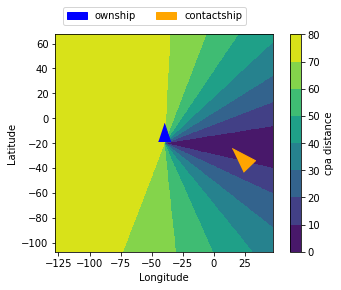

In [11]:
visualizeCPA(-40, 30, 316, 2, -20 ,-40, 4, 100)

### CPAEngine - evalTimeCPA
evalTimeCPA(arg0, arg1, arg2): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* arg2&lt;float&gt;: ostol, Given Ownship Time-on-leg
* return: Time of Closest-Point-of-Approach (CPA)

In [12]:
pybind_cpa.evalTimeCPA(30, 7, 24)

0.04866891432692041

In [13]:
print(pybind_cpa.evalTimeCPA.__doc__)

evalTimeCPA(self: pyivp.CPAEngine, arg0: float, arg1: float, arg2: float) -> float

evalTimeCPA(arg0, arg1, arg2): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
  arg2 <float>: ostol, Given Ownship Time-on-leg 
return: Time of Closest-Point-of-Approach (CPA)



### CPAEngine - evalROC
evalROC(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return: rate-of-closure for a given heading speed

In [14]:
pybind_cpa.evalROC(30, 7)

0.7481640918227548

In [15]:
print(pybind_cpa.evalROC.__doc__)

evalROC(self: pyivp.CPAEngine, arg0: float, arg1: float) -> float

evalROC(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: rate-of-closure for a given heading speed



### CPAEngine - crossesStern
crossesStern(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return: Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its stern.

In [16]:
pybind_cpa.crossesStern(30, 2)

True

In [17]:
print(pybind_cpa.crossesStern.__doc__)

crossesStern(self: pyivp.CPAEngine, arg0: float, arg1: float) -> bool

crossesStern(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour)
return: Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its stern



### CPAEngine - crossesSternDist
crossesSternDist(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return: Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its stern. And if so, at what distance when it crosses?

In [18]:
pybind_cpa.crossesSternDist(30, 2)

0.8959226585821285

In [19]:
print(pybind_cpa.crossesSternDist.__doc__)

crossesSternDist(self: pyivp.CPAEngine, arg0: float, arg1: float) -> float

crossesSternDist(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its stern. And if so, at what distance when it crosses?



### CPAEngine - crossesBow
crossesBow(arg0, arg1): 
* arg0&lt;float&gt;: osCRS, Given Ownship Coordinate Reference System  (degrees: 0-359)
* arg1&lt;float&gt;: osSPD, Given Ownship Speed (Unit: knots per hour)
* return:  Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its bow.

In [20]:
pybind_cpa.crossesBow(30, 5)

True

In [21]:
print(pybind_cpa.crossesBow.__doc__)

crossesBow(self: pyivp.CPAEngine, arg0: float, arg1: float) -> bool

crossesBow(arg0, arg1): 
Args: 
  arg0 <float>: osCRS, Given Ownship Coordinate Reference System (degrees: 0-359) 
  arg1 <float>: osSPD, Given Ownship Speed (Unit: knots per hour) 
return: Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its bow



### CPAEngine - crossesBowDist
crossesBowDist(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return:  Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its bow. And if so, at what distance when it crosses?

In [22]:
pybind_cpa.crossesBowDist(30, 5)

0.18151125674575103

In [23]:
print(pybind_cpa.crossesBowDist.__doc__)

crossesBowDist(self: pyivp.CPAEngine, arg0: float, arg1: float) -> float

crossesBowDist(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its bow. And if so, at what distance when it crosses?



### CPAEngine - crossesBowOrStern
crossesBowOrStern(arg0, arg1): 
* arg0&lt;float&gt;: osCRS, Given Ownship Coordinate Reference System  (degrees: 0-359)
* arg1&lt;float&gt;: osSPD, Given Ownship Speed (Unit: knots per hour)
* return:  Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its stern or bow.

In [24]:
pybind_cpa.crossesBowOrStern(30, 5)

True

In [25]:
print(pybind_cpa.crossesBowOrStern.__doc__)

crossesBowOrStern(self: pyivp.CPAEngine, arg0: float, arg1: float) -> bool

crossesBowOrStern(arg0, arg1): 
Args: 
  arg0 <float>: osCRS, Given Ownship Coordinate Reference System (degrees: 0-359) 
  arg1 <float>: osSPD, Given Ownship Speed (Unit: knots per hour) 
return: Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its stern or bow



### CPAEngine - passesPort
passesPort(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return:  Determine if for the given ownship course and speed whether it will pass the contact on the contact's port side. A "pass" means it will cross the contact's beam, the line perpendicular to the contact's bow-stern line.

In [26]:
pybind_cpa.passesPort(30, 5)

True

In [27]:
print(pybind_cpa.passesPort.__doc__)

passesPort(self: pyivp.CPAEngine, arg0: float, arg1: float) -> bool

passesPort(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Determine if for the given ownship course and speed whether it will pass the contact on the contact's port side. A pass means it will cross the contact's beam, the line perpendicular to the contact's bow-stern line



### CPAEngine - passesPortDist
passesPortDist(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return:  Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its port. And if so, at what distance when it crosses?

In [28]:
pybind_cpa.passesPortDist(30, 5)

0.2384892285221384

In [29]:
print(pybind_cpa.passesPortDist.__doc__)

passesPortDist(self: pyivp.CPAEngine, arg0: float, arg1: float) -> float

passesPortDist(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its port. And if so, at what distance when it crosses?



### CPAEngine - passesStar
passesStar(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return:  Determine if for the given ownship course and speed whether it will pass the contact on the contact's star side. A "pass" means it will cross the contact's beam, the line perpendicular to the contact's bow-stern line.

In [30]:
pybind_cpa.passesStar(270, 5)

True

In [31]:
print(pybind_cpa.passesStar.__doc__)

passesStar(self: pyivp.CPAEngine, arg0: float, arg1: float) -> bool

passesStar(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Determine if for the given ownship course and speed whether it will pass the contact on the contact's star side. A pass means it will cross the contact's beam, the line perpendicular to the contact's bow-stern line



### CPAEngine - passesStarDist
passesStarDist(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return:  Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its star. And if so, at what distance when it crosses?

In [32]:
pybind_cpa.passesStarDist(270, 5)

0.09443804898671398

In [33]:
print(pybind_cpa.passesStarDist.__doc__)

passesStarDist(self: pyivp.CPAEngine, arg0: float, arg1: float) -> float

passesStarDist(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Determine if for the given ownship course and speed whether it is on a path to cross the path of the contact on its star. And if so, at what distance when it crosses?



### CPAEngine - passesPortOrStar
passesPortOrStar(arg0, arg1): 
* arg0&lt;float&gt;: osCRS, Given Ownship Coordinate Reference System  (degrees: 0-359)
* arg1&lt;float&gt;: osSPD, Given Ownship Speed (Unit: knots per hour)
* return:  Determine if for the given ownship course and speed whether it will pass the contact.

In [34]:
pybind_cpa.passesPortOrStar(270, 5)

True

In [35]:
print(pybind_cpa.passesPortOrStar.__doc__)

passesPortOrStar(self: pyivp.CPAEngine, arg0: float, arg1: float) -> bool

passesPortOrStar(arg0, arg1): 
Args: 
  arg0 <float>: osCRS, Given Ownship Coordinate Reference System  (degrees: 0-359) 
  arg1 <float>: osSPD, Given Ownship Speed (Unit: knots per hour) 
return: Determine if for the given ownship course and speed whether it will pass the contact



### CPAEngine - turnsRight
turnsRight(arg0, arg1): 
* arg0&lt;float&gt;: present_heading, Given Ownship present heading (degrees: 0-359)
* arg1&lt;float&gt;: heading, Given Ownship desired heading (degrees: 0-359)
* return:  Determine if present ownship heading, whether or not the proposed heading represent a righthand turn (starboard).

In [36]:
pybind_cpa.turnsRight(45, 90)

True

In [37]:
print(pybind_cpa.turnsRight.__doc__)

turnsRight(self: pyivp.CPAEngine, arg0: float, arg1: float) -> bool

turnsRight(arg0, arg1): 
Args: 
  arg0 <float>: present_heading, Given Ownship present heading (degrees: 0-359) 
  arg1 <float>: heading, Given Ownship desired heading (degrees: 0-359) 
Determine if present ownship heading, whether or not the proposed heading represent a righthand turn (starboard)



### CPAEngine - turnsLeft
turnsLeft(arg0, arg1): 
* arg0&lt;float&gt;: present_heading, Given Ownship present heading (degrees: 0-359)
* arg1&lt;float&gt;: heading, Given Ownship desired heading (degrees: 0-359)
* return:  Determine if present ownship heading, whether or not the proposed heading represent a lefthand turn (port).

In [38]:
pybind_cpa.turnsLeft(90, 45)

True

In [39]:
print(pybind_cpa.turnsLeft.__doc__)

turnsLeft(self: pyivp.CPAEngine, arg0: float, arg1: float) -> bool

turnsLeft(arg0, arg1): 
Args: 
  arg0 <float>: present_heading, Given Ownship present heading (degrees: 0-359) 
  arg1 <float>: heading, Given Ownship desired heading (degrees: 0-359) 
Determine if present ownship heading, whether or not the proposed heading represent a lefthand turn (port)



### CPAEngine - bearingRate
bearingRate(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return:  Calculate the bearing rate from the speed at tangent, where range is the current range between vehicles.

In [40]:
pybind_cpa.bearingRate(50, 4)

150.67244548620943

In [41]:
print(pybind_cpa.bearingRate.__doc__)

bearingRate(self: pyivp.CPAEngine, arg0: float, arg1: float) -> float

bearingRate(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Calculate the bearing rate from the speed at tangent, where range is the current range between vehicles



function: bearingRateOld(osh, osv) has same ability

In [42]:
pybind_cpa.bearingRateOld(50, 4)

150.67244548626076

In [43]:
print(pybind_cpa.bearingRateOld.__doc__)

bearingRateOld(self: pyivp.CPAEngine, arg0: float, arg1: float) -> float

bearingRateOld(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Calculate the bearing rate from the speed at tangent, where range is the current range between vehicles



### CPAEngine - ownshipContactRelBearing
ownshipContactRelBearing(arg0): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* return:  Calculate the contact angle related to bearing.

In [44]:
pybind_cpa.ownshipContactRelBearing(40)

221.25383773744448

In [45]:
print(pybind_cpa.ownshipContactRelBearing.__doc__)

ownshipContactRelBearing(self: pyivp.CPAEngine, arg0: float) -> float

ownshipContactRelBearing(arg0): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
return: Calculate the contact angle related to bearing



### CPAEngine - getOSSpeedInCNHeading
getOSSpeedInCNHeading(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return:  Calculate Ownship's speed from contact heading.

In [46]:
pybind_cpa.getOSSpeedInCNHeading(40, 5)

4.92403876506103

In [47]:
print(pybind_cpa.getOSSpeedInCNHeading.__doc__)

getOSSpeedInCNHeading(self: pyivp.CPAEngine, arg0: float, arg1: float) -> float

getOSSpeedInCNHeading(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Calculate Ownship's speed from contact heading



### CPAEngine - getOSSpeedGamma
getOSSpeedGamma(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return:  Calculate Ownship's speed in direction perpendicular to contact.

In [48]:
pybind_cpa.getOSSpeedGamma(40, 5)

0.8682408883341995

In [49]:
print(pybind_cpa.getOSSpeedGamma.__doc__)

getOSSpeedGamma(self: pyivp.CPAEngine, arg0: float, arg1: float) -> float

getOSSpeedGamma(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Calculate Ownship's speed in direction perpendicular to contact



### CPAEngine - getOSSpeedEpsilon
getOSSpeedEpsilon(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return:  Calculate Ownship's speed in direction of the contact beam.

In [50]:
pybind_cpa.getOSSpeedEpsilon(40, 5)

1.07596123493897

In [51]:
print(pybind_cpa.getOSSpeedEpsilon.__doc__)

getOSSpeedEpsilon(self: pyivp.CPAEngine, arg0: float, arg1: float) -> float

getOSSpeedEpsilon(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Calculate Ownship's speed in direction of the contact beam



### CPAEngine - getOSTimeGamma
getOSTimeGamma(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return:  Calculate Ownship's time gamma.

In [52]:
pybind_cpa.getOSTimeGamma(40, 5)

0.23579228292744728

In [53]:
print(pybind_cpa.getOSTimeGamma.__doc__)

getOSTimeGamma(self: pyivp.CPAEngine, arg0: float, arg1: float) -> float

getOSTimeGamma(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Calculate Ownship's time gamma.



### CPAEngine - getOSTimeEpsilon
getOSTimeEpsilon(arg0, arg1): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* return:  Calculate Ownship's time epsilon.

In [54]:
pybind_cpa.getOSTimeEpsilon(40, 5)

0.313509983859109

In [55]:
print(pybind_cpa.getOSTimeEpsilon.__doc__)

getOSTimeEpsilon(self: pyivp.CPAEngine, arg0: float, arg1: float) -> float

getOSTimeEpsilon(arg0, arg1): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
return: Calculate Ownship's time epsilon



### CPAEngine - getARange
getARange(arg0, arg1, arg2): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* arg2&lt;float&gt;: time, Given Ownship Speed (Unit: knots per hour)
* return:  Calculate the range at a particular time in the future, not necessarily the time at min CPA.

In [56]:
pybind_cpa.getARange(10, 5, 20)

77.19775524316742

In [57]:
print(pybind_cpa.getARange.__doc__)

getARange(self: pyivp.CPAEngine, arg0: float, arg1: float, arg2: float) -> float

getARange(arg0, arg1, arg2): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
  arg2 <float>: time, Given Ownship Speed (Unit: knots per hour) 
return: Calculate the range at a particular time in the future, not necessarily the time at min CPA



### CPAEngine - getARangeRate
getARangeRate(arg0, arg1, arg2): 
* arg0&lt;float&gt;: osh, Given Ownship Course (degrees: 0-359)
* arg1&lt;float&gt;: osv, Given Ownship Speed (Unit: knots per hour)
* arg2&lt;float&gt;: time, Given Ownship Speed (Unit: knots per hour)
* return:  Calculate the range rate at a particular time in the future, not necessarily the time at min CPA.

In [58]:
pybind_cpa.getARangeRate(10, 5, 20)

598.713553986461

In [59]:
print(pybind_cpa.getARangeRate.__doc__)

getARangeRate(self: pyivp.CPAEngine, arg0: float, arg1: float, arg2: float) -> float

getARangeRate(arg0, arg1, arg2): 
Args: 
  arg0 <float>: osh, Given Ownship Course (degrees: 0-359) 
  arg1 <float>: osv, Given Ownship Speed (Unit: knots per hour) 
  arg2 <float>: time, Given Ownship Speed (Unit: knots per hour) 
return: Calculate the range rate at a particular time in the future, not necessarily the time at min CPA

